In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
aaa = pd.read_excel('train_valid_dt.xlsx',index_col=0)
bbb = pd.read_excel('test_dt.xlsx',index_col=0)

In [31]:
aaa.shape

(1226, 7)

In [21]:
bbb

,0,1,대학생,대학원생,교직원,교수,일반인,합계
0,칠암 창업보육센터 입주업체를,당 센터에서는 신기술과 신제품 개발로 지역 산업의 새로운 도약을 선도할 우수한 창업...,1,1,1,1,1,5
2,예비군연대 근로장학생 모집 안 내가 좌 캠퍼스,예비군연대 근로장학생 모집 예비군연대가 좌 캠퍼스 교내 근로장학생을 모집합니다 아래...,1,0,0,0,0,1
3,지속 가능발전 목표 인식 제고를 위한 교육 개최,지속 가능발전 목표 인식 제고를 위한 교육을 다음과 같이 개최하오니 관심 있는 분들...,1,1,1,1,1,5
4,안내 병역판정 검사 일자 및 장소 본인 선택 안내,병무청에서는 병역판정 검사 대상자가 편리하고 자율적으로 병역의무를 이행할 수 있도록...,1,1,1,0,0,3
5,홍보 자이언 티원 슈타인 콘서트 교직원 및 학생 할인 안내,안녕하세요 단계적 일상 회복 전환에 따른 사회적 거리두기 지침이 개편됨에 따라 주전...,1,1,1,0,0,3
8,안내 브루나이 정부 초청 장학생 선발 안내,브루나이 정부 초청 장학생 선발을 다음과 같이 안내하오니 관심 있는 학생들의 많은 ...,1,1,0,0,0,2
0,구경남과 기대 전과 시행 안내,구경남과 기대 전과 시행 계획을 다음과 같이 알려드리오니 희망자는 신청하여 주시기 ...,1,0,0,0,0,1
1,구경 상대 학교 전과 시행 안내 신청 매뉴얼 추가,경상대학교 전과 시행계획을 안내해 드립니다 세부사항 첨부파일 참조 주요 추진일정 신...,1,0,0,0,0,1
2,강원대학교 교류 수학 안내,강원대학교 교류 수학에 관해 안내드립니다 희망하는 학생은 학과사무실을 통하여 관련 ...,1,0,0,0,0,1
3,전북대학교 교류 수학 안내,전북대학교 교류 수학에 관해 안내드립니다 희망하는 학생은 학과사무실을 통하여 관련 ...,1,0,0,0,0,1


In [22]:
train_context = aaa.iloc[:,1]
test_context = bbb.iloc[:,1]

In [23]:
len(test_context)

33

In [24]:
train_context

0     교섭요구 노동조합의 확정 공고 노동조합 및 노동관계조정법 시행령 규정에 따라 교섭요...
1     통학 노선버스 관련 운행시간 변동 사항 안내 자로 운행하는 통학 노선버스는 기존 운...
2     상반기 퇴직 공무원 포상 추천 후보자에 대해 아래와 같이 공개검증을 실시하오니 의견...
3     지자체 대학 협력 기반 지역 혁신사업 경남지역 혁신 플랫폼 스마트 공동체 사업단 사...
4     재학생 등록금 추가 수납 일정을 아래와 같이 알려드리니 해당 학생들께서는 등록기간 ...
                            ...                        
7     재 재일한국인 본국투자 협회에서는 국내에서 수학하고 있는 재일 동포 학생들을 대상으...
8     선발 공고 농업인 자녀 장학생 장학생을 다음과 같이 선발하고자 하니 대학생 여러분의...
9     수산 훈계 장학금 지원내용 학기당 지원 대상 자격요건 신규자 해양수산계열 대학 해양...
10    대학생 청소년교육지원 사업 멘토 대체 추가 선발 결과 안내 대학생 청소년교육지원 사...
11    푸른 등 대 기부 장학사업 신규 장학생 선발 내용 세부사항은 참조 유형 기부처 선발...
Name: 1, Length: 1226, dtype: object

In [25]:
test_context.size

33

In [26]:
context = pd.concat([test_context,train_context])

In [27]:
context

0     당 센터에서는 신기술과 신제품 개발로 지역 산업의 새로운 도약을 선도할 우수한 창업...
2     예비군연대 근로장학생 모집 예비군연대가 좌 캠퍼스 교내 근로장학생을 모집합니다 아래...
3     지속 가능발전 목표 인식 제고를 위한 교육을 다음과 같이 개최하오니 관심 있는 분들...
4     병무청에서는 병역판정 검사 대상자가 편리하고 자율적으로 병역의무를 이행할 수 있도록...
5     안녕하세요 단계적 일상 회복 전환에 따른 사회적 거리두기 지침이 개편됨에 따라 주전...
                            ...                        
7     재 재일한국인 본국투자 협회에서는 국내에서 수학하고 있는 재일 동포 학생들을 대상으...
8     선발 공고 농업인 자녀 장학생 장학생을 다음과 같이 선발하고자 하니 대학생 여러분의...
9     수산 훈계 장학금 지원내용 학기당 지원 대상 자격요건 신규자 해양수산계열 대학 해양...
10    대학생 청소년교육지원 사업 멘토 대체 추가 선발 결과 안내 대학생 청소년교육지원 사...
11    푸른 등 대 기부 장학사업 신규 장학생 선발 내용 세부사항은 참조 유형 기부처 선발...
Name: 1, Length: 1259, dtype: object

In [28]:
### TF-IDF를 활용하여 데이터 targetting
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(context)

In [29]:
idx = []
num=0
for i in test_context:
    context = pd.concat([pd.Series([i]),train_context])
    tfidf_matrix = tfidf_vectorizer.fit_transform(context)
    document_distances = (tfidf_matrix * tfidf_matrix.T)
    text_similarity = document_distances.toarray()[0,:]
    if len(np.where(text_similarity>0.9)[0]) > 1:
        print('0.9갯수',len(np.where(text_similarity>0.9)[0]))
        idx.append(np.where(text_similarity>0.9)[0][1:]-1)
    elif len(np.where(text_similarity>0.8)[0]) > 1:
        print('0.8갯수',len(np.where(text_similarity>0.9)[0]))
        idx.append(np.where(text_similarity>0.8)[0][1:]-1)
    elif len(np.where(text_similarity>0.7)[0]) > 1:
        print('0.7갯수',len(np.where(text_similarity>0.9)[0]))
        idx.append(np.where(text_similarity>0.7)[0][1:]-1)
    elif len(np.where(text_similarity>0.6)[0]) > 1:
        print('0.6갯수',len(np.where(text_similarity>0.6)[0]))
        idx.append(np.where(text_similarity>0.6)[0][1:]-1)
    else:
        print('0.5갯수',len(np.where(text_similarity>0.5)[0]))
        idx.append(np.where(text_similarity>0.5)[0][1:]-1)

0.9갯수 3
0.5갯수 1
0.5갯수 1
0.5갯수 1
0.5갯수 1
0.5갯수 1
0.5갯수 1
0.5갯수 1
0.8갯수 1
0.8갯수 1
0.7갯수 1
0.9갯수 2
0.5갯수 1
0.8갯수 1
0.7갯수 1
0.8갯수 1
0.5갯수 1
0.9갯수 2
0.8갯수 1
0.9갯수 7
0.6갯수 3
0.8갯수 1
0.5갯수 1
0.9갯수 2
0.6갯수 3
0.6갯수 2
0.5갯수 1
0.5갯수 1
0.9갯수 7
0.8갯수 1
0.7갯수 1
0.5갯수 1
0.5갯수 2


In [30]:
pd.DataFrame(idx).to_excel('tfidf_connect_index.xlsx')

In [69]:
a = '생활관 관생 을 모집 합니다'
b = '생활관 관생 을 추가 모집 합니다'
c = '일본 교환학생 을 모집 합니다'

In [70]:
tfidf_vectorizer = TfidfVectorizer(min_df=1)

In [71]:
tfidf_matrix = tfidf_vectorizer.fit_transform(pd.DataFrame([a,b,c])[0])
document_distances = (tfidf_matrix * tfidf_matrix.T)
text_similarity = document_distances.toarray()[0,:]

In [72]:
tfidf_vectorizer.vocabulary_

{'생활관': 3, '관생': 0, '모집': 2, '합니다': 6, '추가': 5, '일본': 4, '교환학생': 1}

In [73]:
tfidf_matrix.toarray()

array([[0.55847784, 0.        , 0.43370786, 0.55847784, 0.        ,
        0.        , 0.43370786],
       [0.45014501, 0.        , 0.34957775, 0.45014501, 0.        ,
        0.59188659, 0.34957775],
       [0.        , 0.6088451 , 0.35959372, 0.        , 0.6088451 ,
        0.        , 0.35959372]])

In [74]:
document_distances.toarray()

array([[1.        , 0.80602126, 0.31191725],
       [0.80602126, 1.        , 0.25141193],
       [0.31191725, 0.25141193, 1.        ]])

In [27]:
opop = pd.DataFrame()
for i in range(len(idx)):
    opop = pd.concat([opop,pd.DataFrame(np.mean(aaa.iloc[idx[i],2:])).T])

In [28]:
opop

,대학생,대학원생,교직원,교수,일반인
0,NaN,NaN,NaN,NaN,NaN
0,1.0,0.0,0.0,0.0,0.0
0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN
0,1.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0
0,NaN,NaN,NaN,NaN,NaN


23

In [29]:
opop.to_excel('tf-idf_answer_version2.xlsx')

In [26]:
for i in context.iloc[]:
    print(type(i))

<class 'int'>


In [13]:
document_distances = (tfidf_matrix * tfidf_matrix.T)

In [16]:
document_distances.toarray()[0,:]

array([1.        , 0.02138757, 0.00860899, ..., 0.02549037, 0.0218322 ,
       0.02523067])

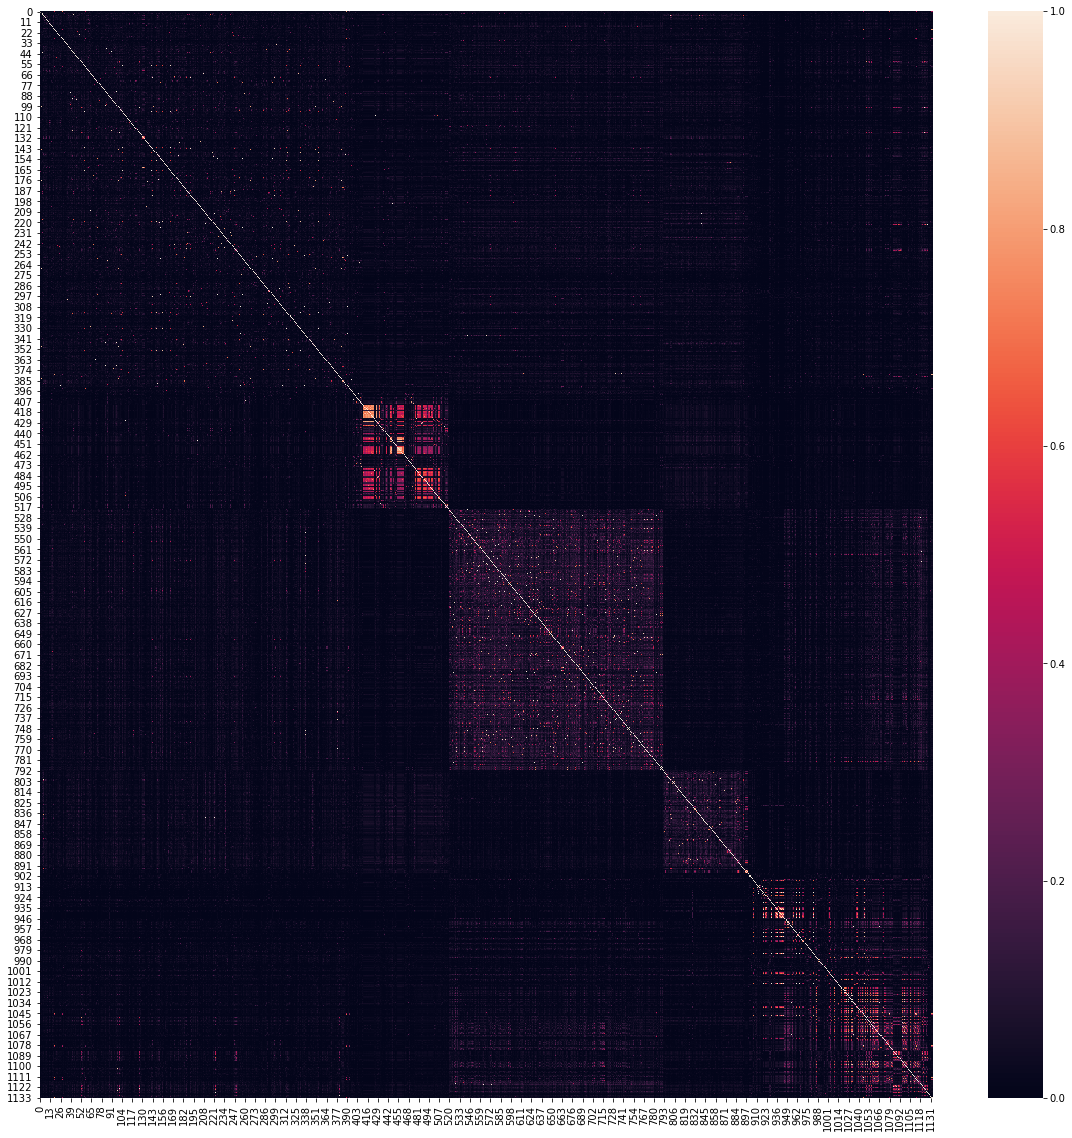

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(document_distances.toarray())
plt.savefig('tf_idf_heatmap.png',dpi=200)

## TF-IDF 유사도를 활용하여 label이 정해지지 않은 label을 체크

In [117]:
check_document_distance = document_distances.toarray()[0,:]
idx = []
for i in [0.9,0.8,0.7,0.6]:
    if len(np.where(check_document_distance>i)[0])>=2:
        idx.extend(np.where(check_document_distance>i)[0])
        break